# Importing Libraries

In [1]:
# important packages

import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis
import seaborn as sns				# Statistical data visualization
import cv2							# Image and Video processing library

import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

pd.set_option('display.max_colwidth',1000)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import re # for regular expressions

import nltk # for text manipulation
nltk.download('punkt') # Punkt Sentence Tokenizer

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pwd

/content


# Importing Dataset

In [5]:
df = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/train.txt")
df_test = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/test_samples.txt")
df.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out)
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney


In [6]:
df.shape

(21465, 3)

In [7]:
df_test.head()

,tweet_id,tweet_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor, margate, ocean city area. I'm just waiting for the coordinator to hopefully call me tomorrow"
1,218775148495515649,"Musical awareness: Great Big Beautiful Tomorrow has an ending, Now is the time does not"
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour analyst Shawn Hattingh: Cosatu's role in the context of unrest in the mining http://t.co/46pjzzl6
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susah Susah.usaha Aja blm udh nyerah,inget.if you never try you'll never know.cowok kok gentle bgt"
4,171874368908050432,"Excuse the connectivity of this live stream, from Baba Amr, so many activists using only one Sat Modem. LIVE http://t.co/U283IhZ5 #Homs"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21465 entries, 0 to 21464
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    21465 non-null  int64 
 1   sentiment   21465 non-null  object
 2   tweet_text  21465 non-null  object
dtypes: int64(1), object(2)
memory usage: 503.2+ KB


In [9]:
df["sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

# Data Visualization

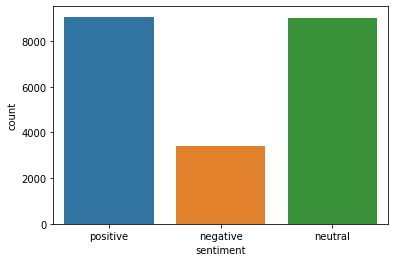

In [10]:
sns.countplot(df['sentiment'], label = "Count")

In [11]:
positive = df[df["sentiment"] == 'positive']
negative = df[df["sentiment"] == 'negative']
neutral = df[df["sentiment"] == 'neutral']

In [12]:
positive_percentage = (positive.shape[0]/df.shape[0])*100
negative_percentage = (negative.shape[0]/df.shape[0])*100
neutral_percentage = (neutral.shape[0]/df.shape[0])*100
print(f"Positve Tweets = {positive_percentage:.2f}%\nNegative Tweets = {negative_percentage:.2f}%\nNeutral Tweets = {neutral_percentage:.2f}%")

Positve Tweets = 42.23%
Negative Tweets = 15.78%
Neutral Tweets = 41.99%


# Data Cleaning

In [13]:
df_test["sentiment"] = "NA"

df_total = pd.concat((df, df_test), ignore_index=True)
df_total.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out)
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney


In [14]:
df_total.shape

(26863, 3)

In [15]:
#### Removing Twitter Handles (@user)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [16]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
corpus = []
for i in range(df_total.shape[0]):
  text = np.vectorize(remove_pattern)(df_total['tweet_text'][i], "@[\w]*")   # Removing Twitter Handles (@user)
  text = str(text)                                                           
  text = re.sub('[^a-zA-Z]', ' ', text)                                      # Removing Punctuations, Numbers, and Special Characters
  text = re.sub(r'\s+', ' ', text).strip()                                   # Remove_trailing_spaces(input_txt)
  text = text.lower()                                                        # Convert to lower case
  text = text.split()                                                        # Split-data
  lemmatizer = WordNetLemmatizer()                                           #WordNet Lemmatization
  #ps = PorterStemmer()                                                      #porter's stemmer
  all_stopwords = stopwords.words('english')                                 # List of Stopwords
  all_stopwords.remove('not')
  text = [lemmatizer.lemmatize(word) for word in text if not word in set(all_stopwords)]
  #text = [ps.stem(word) for word in text if not word in set(all_stopwords)]
  text = ' '.join(text)
  corpus.append(text)

In [18]:
len(corpus)

26863

In [19]:
### to find no. of sentences with words >500

num = 0
for i in range(len(corpus)):
    if (len(corpus[i]) >= 500):
        num = num + 1
num

6

# Data Visualization

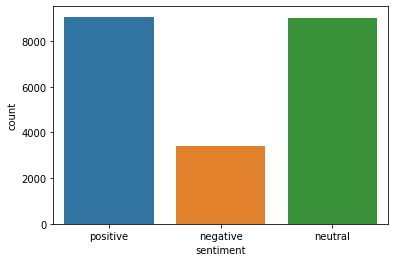

In [20]:
sns.countplot(df['sentiment'], label = "Count")

In [21]:
positive = df[df["sentiment"] == 'positive']
negative = df[df["sentiment"] == 'negative']
neutral = df[df["sentiment"] == 'neutral']

In [22]:
positive_percentage = (positive.shape[0]/df.shape[0])*100
negative_percentage = (negative.shape[0]/df.shape[0])*100
neutral_percentage = (neutral.shape[0]/df.shape[0])*100
print(f"Positve Tweets = {positive_percentage:.2f}%\nNegative Tweets = {negative_percentage:.2f}%\nNeutral Tweets = {neutral_percentage:.2f}%")

Positve Tweets = 42.23%
Negative Tweets = 15.78%
Neutral Tweets = 41.99%


# Bag of Words Model

#### CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
X= cv.fit_transform(corpus).toarray()

In [24]:
len(X[0])

### TfidfVectorizer

In [25]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#tv = TfidfVectorizer()
#X = tv.fit_transform(corpus).toarray()

In [26]:
len(X[0])

37160

# Data Splitting

In [27]:
X_train = X[:21465]
X_test = X[21465:]
y_train = df.iloc[:, 1].values

In [28]:
X_train.shape

(21465, 37160)

In [29]:
y_train.shape

(21465,)

In [30]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Model Prediction

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
print(y_pred)
print(y_pred.shape)

['neutral' 'positive' 'neutral' ... 'positive' 'neutral' 'positive']
(5398,)


In [33]:
list1 = []
heading = ['tweet_id', 'sentiment']

list1.append(heading)

for i in range(len(y_pred)):
        sub = []
        sub.append(df_test["tweet_id"][i])
        sub.append(y_pred[i])
        list1.append(sub)

# Generate Submission File

In [34]:
import csv
with open('/content/drive/My Drive/P1: Twitter Sentiment Analysis/Models/NB_TV.csv', 'w', newline='') as fp:
    a = csv.writer(fp, delimiter = ",")
    data = list1
    a.writerows(data)

# Test Accuracy (Count_Vectorizer )= 61.13%

# Test Accuracy (Tf-idf_Vectorizer )= 60.10%
